In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

<ipython-input-1-36f6bd31fbb0>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            Sales
Month            
2011-01-01  266.0
2011-02-01  145.9
2011-03-01  183.1
2011-04-01  119.3
2011-05-01  180.3


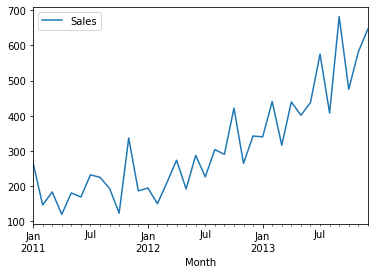

In [2]:
def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

series = read_csv('arimats.csv', header=0, parse_dates=[0], index_col=0, squeeze=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

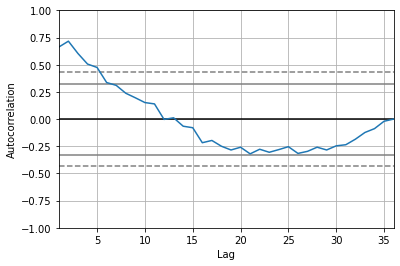

In [3]:
autocorrelation_plot(series)
pyplot.show()

In [5]:
series.index = series.index.to_period('M')

In [6]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

In [7]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 31 Jan 2022   AIC                            408.969
Time:                        11:17:59   BIC                            418.301
Sample:                    01-31-2011   HQIC                           412.191
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

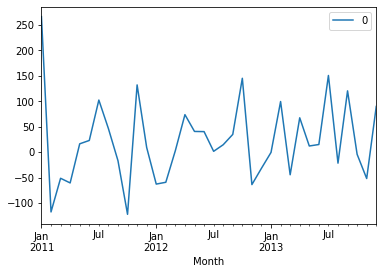

In [8]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

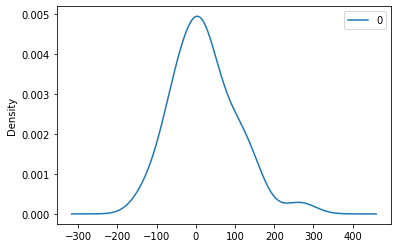

In [9]:
residuals.plot(kind = 'kde')
pyplot.show()

In [10]:
print(residuals.describe())

                0
count   36.000000
mean    21.936145
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [15]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predcited=%f, expected=%f' % (yhat, obs))
          

predcited=293.329674, expected=342.300000
predcited=368.926350, expected=339.700000
predcited=327.001685, expected=440.400000
predcited=323.884976, expected=315.900000
predcited=398.817999, expected=439.300000
predcited=343.957813, expected=401.300000
predcited=423.118266, expected=437.400000
predcited=406.168475, expected=575.500000
predcited=433.137648, expected=407.600000
predcited=536.546516, expected=682.000000
predcited=468.536472, expected=475.300000
predcited=645.203098, expected=581.300000
predcited=558.074348, expected=646.900000


rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


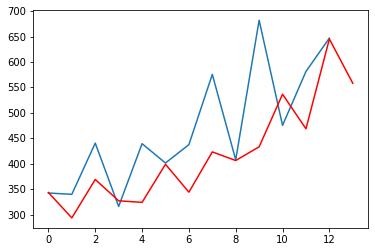

In [17]:
pyplot.plot(test)
pyplot.plot(predictions, color ='red')
pyplot.show()